# <center> **Ánalise dos filmes da Disney lançados entre 2000 a 2021** </center> #
<center><img src="https://media.comicbook.com/2018/11/disney-plus-logo-1143358.jpeg"></center>


####***Integrantes do Grupo: Romulo Lima, Thiago Teixeira, Matheus Coutinho, Marcos Vinícius e João Victor Mariano***####

## **Importando Bibliotecas:** ##
####Bibliotecas responsáveis para ánalise dos dados e desenvolvimento de gráficos.

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

   ### **Importando Dataset:** ###
   #### Lendo o dataset e atribuído na variável "disney"####

In [87]:
filepath = 'disney_plus_titles.csv'
disney = pd.read_csv(filepath)

### **Limpando o dataset:** ###

In [88]:
# Criado uma tabela exclusiva pra filmes
movie = disney[disney['type'] == 'Movie'].copy()

# Excluindo filmes que foram lançados antes do ano 2000
movie.drop(movie[movie['release_year'] < 2000].index, inplace = True)

# Removendo colunas indesejáveis
cols_to_drop = ['director','cast', 'listed_in']
movie.drop(cols_to_drop, axis='columns', inplace=True)

# Removendo "mins" da coluna "duration" e convertendo para inteiro
movie['duration']= movie['duration'].str.replace('min', '').astype('int64')

# removendo valor vazio (presentes em alguns filmes) da coluna rating
movie['rating'].dropna(inplace=True)

### **Duração média dos filmes de acordo com a avaliação** ###

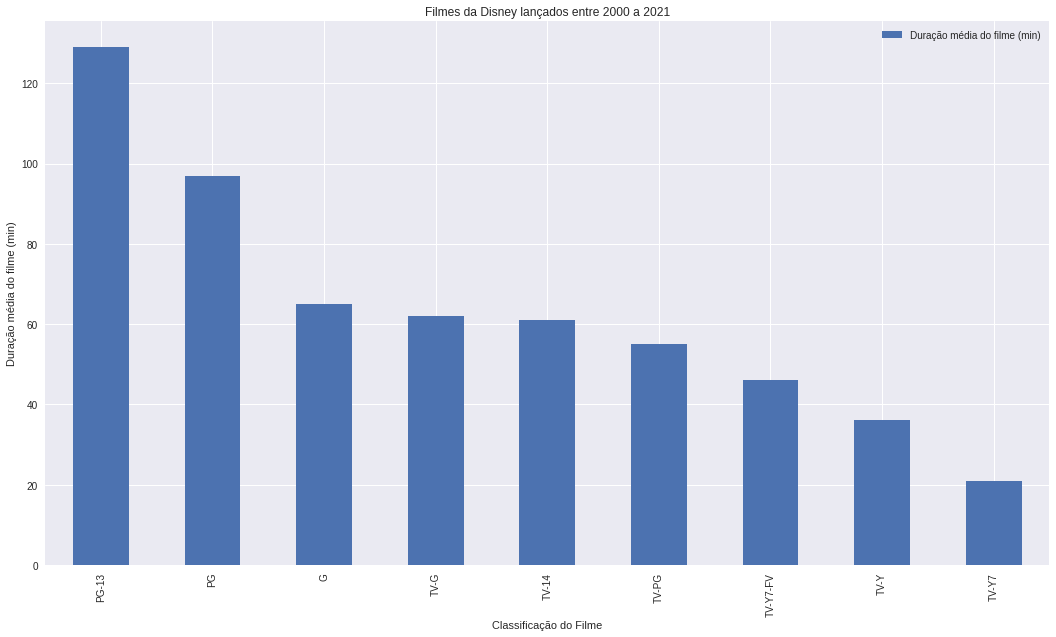

In [89]:
# Realizando um groupby de acordo com a classificação (rating) e fazendo média
avg_movie_length_by_rating = movie[['rating','duration']] \
                                .groupby('rating') \
                                .mean() \
                                .sort_values(by='duration', ascending=False) \
                                .round() \
                                .rename(columns={'duration' : 'Duração média do filme (min)'})
avg_movie_length_by_rating.index.name = 'Rating Group'

# Implementando o gráfico bar e definindo o tamanho do mesmo
avg_movie_length_by_rating.plot(kind='bar', figsize=(18,10))
plt.ylabel('Duração média do filme (min)')
plt.xlabel('Classificação do Filme')
plt.title('Filmes da Disney lançados entre 2000 a 2021');

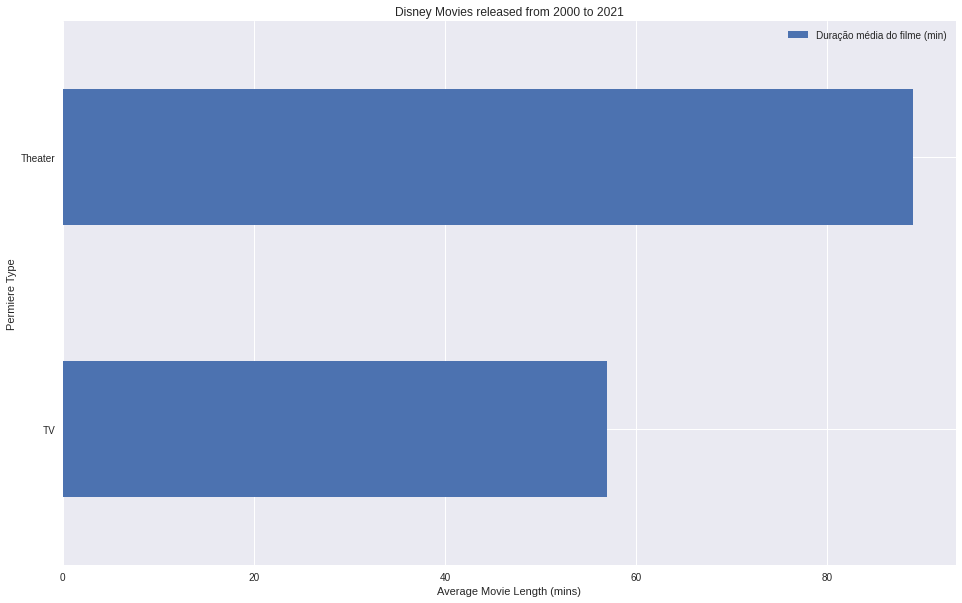

In [91]:
# Adicionada a coluna "premiere_type" para classificar se o filme foi lançado na televisão ou teatro/cinema de acordo com a coluna de classificação

# Função responsável para definir classificações específicas para TV e Teatro/Cinema
def premiere_type(row): 
    if row['rating'] in ['TV-14', 'TV-PG', 'TV-Y', 'TV-G', 'TV-Y7-FV', 'TV-Y7']: 
        return 'TV'
    else: 
        return 'Theater'

# Coluna criada       
movie['premiere_type'] = movie.apply(premiere_type, axis=1)

# Tempo médio de duração de acordo com o tipo de classificação
avg_movie_length_by_rating_type = movie[['premiere_type','duration']] \
                                .groupby('premiere_type') \
                                .mean() \
                                .sort_values(by='duration') \
                                .round() \
                                .rename(columns={'duration' : 'Duração média do filme (min)'})
avg_movie_length_by_rating_type.index.name = 'Premiere Type Group'

# Implementando o gráfico bar e definindo o tamanho do mesmo
avg_movie_length_by_rating_type.plot(kind='barh', figsize=(16,10))
plt.xlabel('Average Movie Length (mins)')
plt.ylabel('Permiere Type')
plt.title('Disney Movies released from 2000 to 2021');

### **Linha do tempo com a duração média** ###

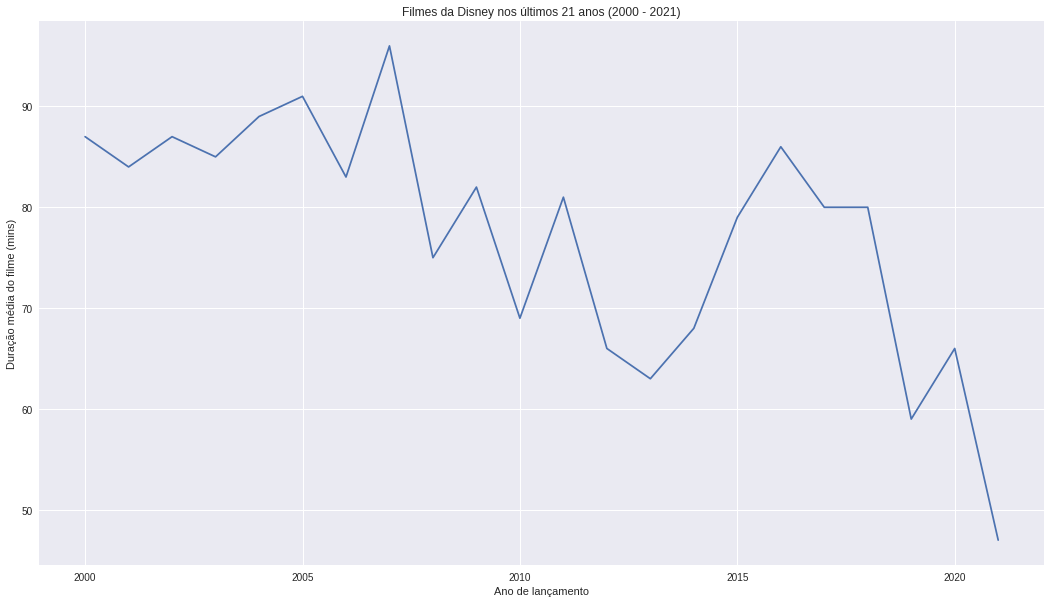

In [92]:
# Média da duração de filmes entre 2000 e 2021
avg_movie_length_by_release_year = movie[['release_year','duration',]] \
                                    .groupby('release_year') \
                                    .mean()\
                                    .round() \
                                    .sort_values(by='release_year', ascending=True)

# Implementando o gráfico e definindo o tamanho do mesmo
avg_movie_length_by_release_year.plot(figsize=(18,10), legend=False)
plt.xlabel('Ano de lançamento')
plt.ylabel('Duração média do filme (mins)')
plt.title('Filmes da Disney nos últimos 21 anos (2000 - 2021)');

## **Linha do tempo com a duração média: Televisão x Estréia no Teatro/Cinema** ##

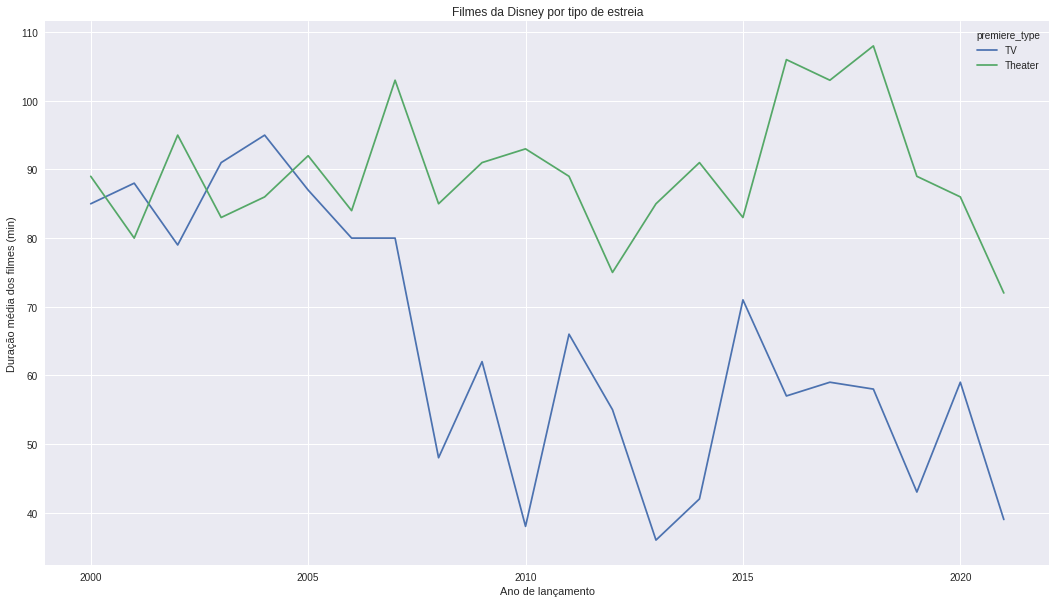

In [93]:
# Utilizada a coluna "premiere_type" que foi criada anteriormente para armazenar filmes lançados na TV ou Teatro/Cinema
# Definindo a média da duração dos filmes
premiere_type_table = pd.pivot_table(movie, values='duration', index=['release_year'], columns=['premiere_type'], aggfunc=np.mean) \
                .round().fillna(0)

# Implementando o gráfico line e definindo o tamanho do mesmo
premiere_type_table.plot(kind='line', figsize=(18,10))
plt.xlabel('Ano de lançamento')
plt.ylabel('Duração média dos filmes (min)')
plt.title('Filmes da Disney por tipo de estreia');

## **Top 5 dos filmes mais longos da Disney:** ##
Neste local foi adicionada uma variável onde foi especificado a coluna "duration", que será responsável por listar os 5 filmes mais longos em ordem descrescente.

In [94]:
Top_5_longest_movies = movie.sort_values(by='duration', ascending=False).head(5)
Top_5_longest_movies[['title','premiere_type', 'release_year', 'duration',]]

,title,premiere_type,release_year,duration
1039,Marvel Studios' Avengers: Endgame,Theater,2019,183
333,Dory's Reef Cam,TV,2020,182
330,Arendelle Castle Yule Log,TV,2020,180
1131,Pirates of the Caribbean: At World's End,Theater,2007,169
735,Avatar,Theater,2009,162


### **Top 5 dos filmes mais curtos da Disney** ###
Novamente relacionado a duração dos filmes, mas neste caso focado nos filmes mais curtos em ordem crescente.

In [95]:
Top_5_shortest_movies = movie.sort_values(by='duration').head(5)
Top_5_shortest_movies[['title', 'premiere_type', 'release_year', 'duration']]

,title,premiere_type,release_year,duration
37,The Proud Family: Louder and Prouder,TV,2021,1
27,Obi-Wan Kenobi,TV,2021,1
15,Baymax!,TV,2021,1
705,"Happy Birthday, Mickey!",TV,2019,2
655,Cars Toons: Bugged,TV,2013,2


### **Separação por grupos de acordo com a duração dos filmes** ###
#### Implementado a função "duration_group", responsável por dividir em 3 grupos: Filmes com menos de 30 min, Entre 30 e 60min e Maior que 60min.####
####Junto a isso, foi criado uma nova coluna "duration_group" para armazenar essas novas informações, sendo possível a visualização em um gráfico bar.####
####Tendo como características: quantidade de filmes e ano de lançamento.####

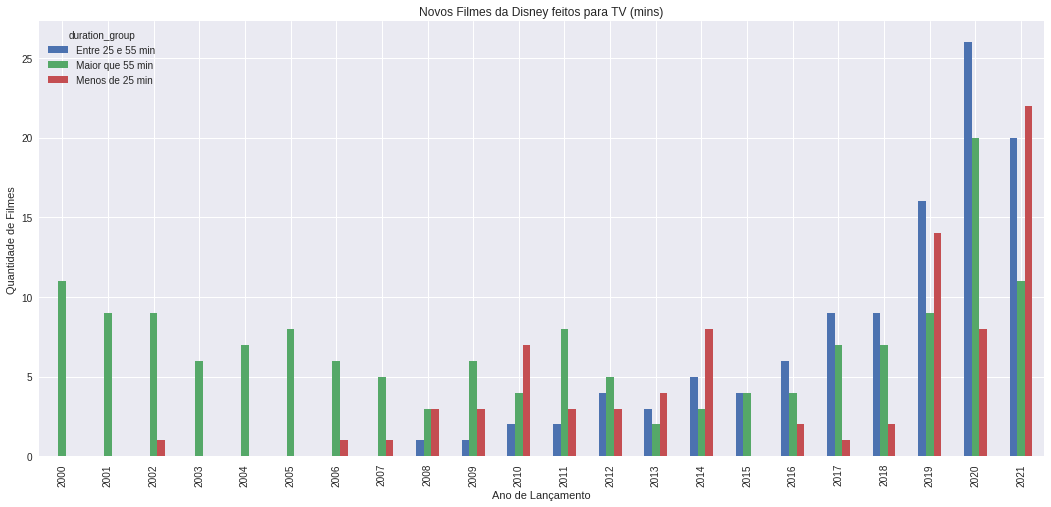

In [96]:
#Função duration_group criada com as suas condições
def duration_group(row): 
    if row['duration'] < 25: 
        return 'Menos de 25 min'
    elif row['duration'] < 55:
        return 'Entre 25 e 55 min'
    else: 
        return 'Maior que 55 min'
    
movie['duration_group'] = movie.apply(duration_group, axis=1)


tv_release = movie[movie['premiere_type'] == 'TV'].copy()
tv_release.groupby(['release_year', 'duration_group'])['release_year'].count().unstack('duration_group').plot(kind='bar', stacked=False, figsize=(18,8))
plt.ylabel('Quantidade de Filmes')
plt.xlabel('Ano de Lançamento')
plt.title('Novos Filmes da Disney feitos para TV (mins)');

###Diretores com o maior número de filmes: Top 5###

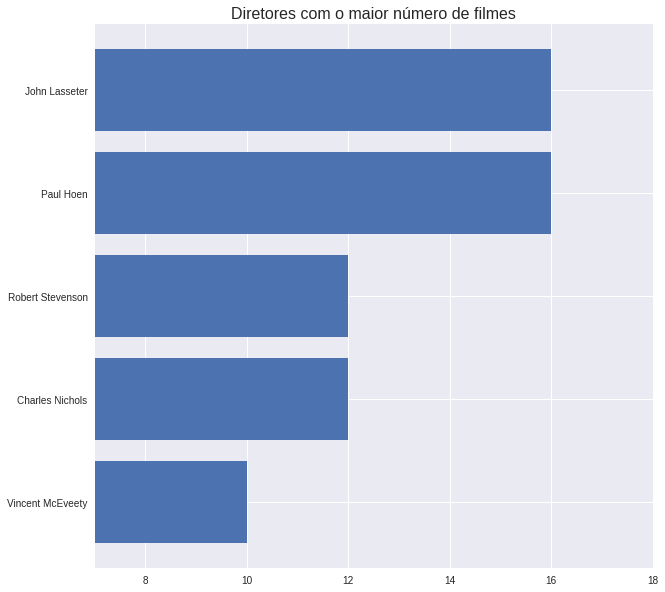

In [97]:
# Escolhendo a quantidade de diretores a ser mostrado no gráfico
directors = disney['director'].value_counts()[1:6] 

# invertendo a ordem
directors = directors.iloc[::-1] 

plt.figure(figsize=(10,10))
plt.style.use('seaborn')
plt.barh(directors.index, directors.values)
plt.title('Diretores com o maior número de filmes', fontsize=16)
plt.xlim([7,18])
plt.show()